Multi Armed slot machine problem - Multi-Amred Bandits, MAB   

Yujin Lee (proqk) - 2021.06.23   
참고 책: 알파제로를 분석하며 배우는 인공지능

Select the arm of the slot machine to gather information (exploration) + Choose the arm with the highest reward (exploitation)   
정보 수집을 위해 슬롯머신의 팔을 선택한다 (탐색) + 보상이 가장 높은 팔을 선택한다 (이용)

In [1]:
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Make slot arm
class SlotArm():
  def __init__(self, p):
    self.p = p #Probability of getting a coin
  
  #Get a reward for choosing an arm
  def draw(self):
    if self.p > random.random():
      return 1.0
    else:
      return 0.0

Epsilon-Greedy - Balance exploration and exploitation   

1. initialize   
Randomly selects an action with E probability (0<=E<=1 integer), and selects an action with the maximum initial reward with 1-E probability.   
Returns the arm number.

  Epsilon-Greedy - 탐색과 이용의 균형을 잡는 방법   
E 확률(0 이상 1이하의 정수)로 랜덤하게 행동을 선택, 1-E 확률로 초기 보상이 최대가 되는 행동을 선택한다.   
팔의 번호를 반환한다.

2. update   
update parameter: (1) +1 number of attempts of the selected arm (2) update the value of the selected arm   

  파라미터를 다음 순서에 따라 갱신한다: (1) 선택한 팔의 시행 횟수+1 (2) 선택한 팔의 가치 갱신   
  선택한 팔의 가치(평균 보상)는 수식에 따라 갱신한다.   
  (이번 시행의 가치:평균 보상) = (시행횟수-1)/(시행횟수) * (이전 시행의 가치 :평균 보상) + 1/시행횟수 * (이번 시행의 보상)

In [3]:
#Calculation epsilon-Greedy
class EpsilonGreedy():
  #init e-greedy
  def __init__(self, epsilon):
    self.epsilon = epsilon #Probability of exploration

  #init n, v (n_arms: number of arms)
  def initialize(self, n_arms): 
    self.n = np.zeros(n_arms) #number of attempts for each arm - list
    self.v = np.zeros(n_arms) #value of each arm - list (평균보상)

  #Select arm
  def select_arm(self):
    if self.epsilon > random.random():
      return np.random.randint(0, len(self.v)) #select random
    else:
      return np.argmax(self.v) #select high value arm

  #Update parameter
  def update(self, chosen_arm, reward, t):
    self.n[chosen_arm] += 1 #number of attempts of the selected arm + 1

    #update the value of the selected arm
    n = self.n[chosen_arm]
    v = self.v[chosen_arm]
    self.v[chosen_arm] = ((n-1) / float(n)) * v + (1 / float(n)) * reward

  #get string info
  def label(self):
    return 'E-greedy('+str(self.epsilon)+')'

In [4]:
#run
def play(algo, arms, num_sims,num_time):
  times = np.zeros(num_sims*num_time) #game times
  rewards = np.zeros(num_sims*num_time) #rewards

  #roop simulation
  for sim in range(num_time):
    algo.initialize(len(arms))

    #roop game
    for time in range(num_time):
      #calculate index
      index = sim * num_time + time

      times[index] = time + 1
      chosen_arm = algo.select_arm()
      reward = arms[chosen_arm].draw()
      rewards[index] = reward

      #update parameter
      algo.update(chosen_arm, reward, time+1)

  return [times, rewards]

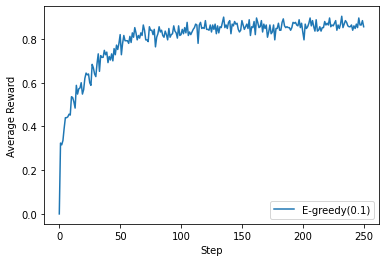

In [5]:
#select arm
arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

#set algorithm
algo = EpsilonGreedy(0.1)

#run
result = play(algo, arms, 1000, 250)

#draw graph
df = pd.DataFrame({'times': result[0], 'rewards': result[1]})
mean = df['rewards'].groupby(df['times']).mean()
plt.plot(mean, label = algo.label())

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc = 'best')
plt.show()